<a href="https://colab.research.google.com/github/simecek/from0toheroin2h/blob/master/colab1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello MNIST!

In this notebook, you'll learn how to train an image classifier train on the MNIST dataset - the "hello world" of computer vision. You'll go through all the steps, including loading the data, building and training a model.




When working in Google Colabobotatory (colab for short), you need first to set up your runtime (from menu select Runtime/Change runtime type) to use GPU as follows:

![alt text](https://camo.githubusercontent.com/35dd980cc32baea8bf2a369a31ad540cadc64d0b/68747470733a2f2f636f757273652e666173742e61692f696d616765732f636f6c61622f30342e706e67)


Next configure your notebook instance and download the MNIST dataset.

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash
  !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

Updating fastai...
Done.
--2019-04-07 17:43:59--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz.2’

mnist.pkl.gz.2      100%[===================>]  15.42M  20.4MB/s    in 0.8s    

2019-04-07 17:43:59 (20.4 MB/s) - ‘mnist.pkl.gz.2’ saved [16168813/16168813]



Load necessary packages:

In [0]:
%matplotlib inline
from fastai.basics import *
import random

## Step 1) Load the dataset

The MNIST dataset contains thousands of grayscale images of handwritten digits.

In [0]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [0]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

The input data are flattened to fit into the first layer of our neural network.
Instead of several 28x28 images, we  have several vectors that are all length 784 (28*28=784).  

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs) # data object to feed into NN

In [0]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

## Step 2) Visualize the data

Show a random sample of the dataset along with it's corresponding labels:


In [0]:
indices = random.sample(range(50000),9)

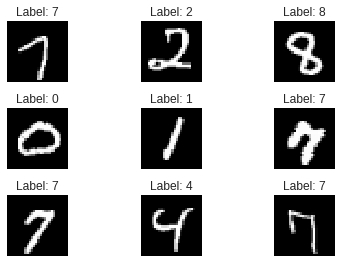

In [0]:
fig = plt.figure()
for i, ind in enumerate(indices):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[ind].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title("Label: {}".format(y_train[ind]))
  plt.xticks([])
  plt.yticks([])

## Step 3) Build the model

Architecture wise, we'll use a single layer network. All layers are Linear - the classic fully-connected neural network layers.
* The hidden layer will have 512 units using the ReLU activation function.
* The output layer will have 10 units, corresponding to the 10 digits, and use softmax function.

The general convention for Pytorch network classes is that you create all your layers in the constructor, and then lay out their relationship in the forward() method.  


In [0]:
class Net(nn.Module):
    def __init__(self, image_size):
        super(Net, self).__init__()
        self.image_size = image_size
        self.fc1 = nn.Linear(image_size, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim =1)
        return x


## Step 4) Training


In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
learn = Learner(data, Net(image_size=28*28), loss_func=loss_func, metrics=accuracy)


In [0]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.187235,0.183770,0.944900,00:05
1,0.097952,0.118884,0.969300,00:05
2,0.040572,0.077022,0.980000,00:05


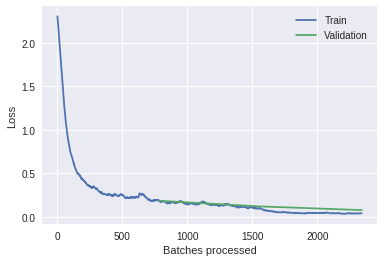

In [0]:
learn.recorder.plot_losses()